## Bayesian Statistics


### 1. Introduction to Bayesian Statistics

#### **What is Bayesian Statistics?**
   - Bayesian statistics is a framework for updating beliefs or estimates about a parameter or hypothesis as more evidence or data becomes available.
   - The central concept is **Bayesian inference**, which differs from frequentist statistics by treating the parameter as a random variable and focusing on the probability of different parameter values given the observed data.
   - **Bayesian vs. Frequentist**:
     - **Bayesian**: Parameters are treated as random variables, and probability is interpreted as the degree of belief.
     - **Frequentist**: Parameters are fixed values, and probability is the long-term frequency of occurrence.

#### **Bayes' Theorem**: The foundation of Bayesian inference.
\[
P(\theta|X) = \frac{P(X|\theta) \cdot P(\theta)}{P(X)}
\]
   - **\( P(\theta|X) \)**: Posterior probability, the updated belief about the parameter \( \theta \) after observing the data \( X \).
   - **\( P(X|\theta) \)**: Likelihood, the probability of the observed data given the parameter.
   - **\( P(\theta) \)**: Prior probability, the belief about the parameter \( \theta \) before observing any data.
   - **\( P(X) \)**: Marginal likelihood or evidence, the total probability of the observed data across all possible values of the parameter.

#### **Steps in Bayesian Inference**:
   1. **Start with a prior**: \( P(\theta) \) — What you believe about the parameter before observing any data.
   2. **Collect data and compute the likelihood**: \( P(X|\theta) \) — How likely is the observed data given the parameter \( \theta \)?
   3. **Update to get the posterior**: Use Bayes' Theorem to combine the prior and likelihood to get the posterior distribution \( P(\theta|X) \), your updated belief after seeing the data.

#### **Example: Coin Flip Bayesian Inference**

Suppose we flip a coin multiple times and want to estimate the probability \( \theta \) of getting heads. We start with a prior belief about \( \theta \) and update it with each observed outcome (heads or tails).



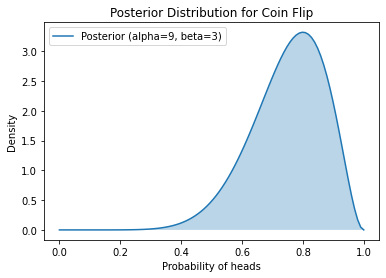

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the Beta prior (uniform prior: alpha=1, beta=1)
alpha_prior = 1
beta_prior = 1

# Data: 8 heads, 2 tails
heads = 8
tails = 2

# Update prior with data to get the posterior parameters
alpha_post = alpha_prior + heads
beta_post = beta_prior + tails

# Generate posterior distribution
x = np.linspace(0, 1, 100)
posterior = beta.pdf(x, alpha_post, beta_post)

# Plot the prior and posterior distributions
plt.plot(x, posterior, label=f"Posterior (alpha={alpha_post}, beta={beta_post})")
plt.fill_between(x, posterior, alpha=0.3)
plt.title("Posterior Distribution for Coin Flip")
plt.xlabel("Probability of heads")
plt.ylabel("Density")
plt.legend()
plt.show()


**Explanation of the Code**:
   - **Prior**: The prior is a **Beta(1,1)** distribution, which is equivalent to a uniform distribution, indicating no prior preference for any particular value of \( \theta \).
   - **Posterior**: After observing 8 heads and 2 tails, the posterior distribution is **Beta(9,3)**. The posterior is updated based on the data, with 8 heads increasing the belief that \( \theta \) (the probability of heads) is closer to 0.8.
   - The plot shows the posterior distribution, which gives a range of likely values for \( \theta \) after updating with the observed data.



### 2. Key Concepts in Bayesian Inference

#### **Priors**
   - A **prior** represents your initial belief about a parameter before observing any data.
   - Priors are essential in Bayesian inference because they allow you to incorporate existing knowledge or assumptions.
   - **Types of Priors**:
     - **Informative Prior**: A prior that reflects strong prior knowledge or belief about the parameter (e.g., expert knowledge).
     - **Non-informative (or flat) Prior**: A prior that expresses little or no knowledge about the parameter, giving all values equal weight (e.g., Beta(1, 1) for binomial data).
     - **Conjugate Prior**: A prior that, when combined with a likelihood function, results in a posterior distribution of the same family. This simplifies the mathematical computations. For example, a Beta prior is conjugate to a binomial likelihood.

#### **Posterior Distribution**
   - The **posterior distribution** is the result of updating your prior belief after observing the data. It represents your updated belief about the parameter \( \theta \).
   - The posterior distribution combines the prior and the likelihood:
   \[
   P(\theta|X) = \frac{P(X|\theta) \cdot P(\theta)}{P(X)}
   \]
   - The posterior distribution is essential because it allows you to make probabilistic statements about the parameter \( \theta \) after observing the data.

#### **Likelihood Function**
   - The **likelihood function** represents how likely the observed data is for different values of the parameter \( \theta \).
   - In Bayesian inference, the likelihood is used to update the prior distribution and obtain the posterior distribution.
   - Example: If you observe data that suggests a higher probability of success in a coin flip, the likelihood will be high for values of \( \theta \) close to 1.

#### **Credible Intervals**
   - A **credible interval** is the Bayesian counterpart to a confidence interval. It represents a range of values within which the true parameter value is believed to lie with a certain probability.
   - Example: A 95% credible interval means that, given the data, there is a 95% probability that the true parameter value lies within the interval.
   - Unlike frequentist confidence intervals, credible intervals allow for probability statements about the parameter itself.

#### **Example: Updating Priors and Computing Credible Intervals**

In this example, we'll calculate the posterior distribution after observing data and compute a 95% credible interval for the parameter \( \theta \) (the probability of getting heads in a coin flip).



95% credible interval: (0.462, 0.909)


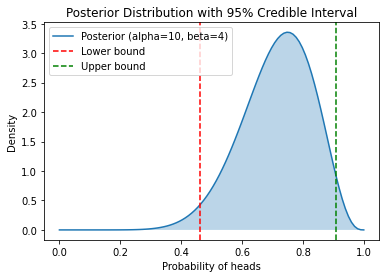

In [5]:
import numpy as np
from scipy.stats import beta

# Prior parameters (Beta distribution)
alpha_prior = 2
beta_prior = 2

# Data: number of heads and tails observed
heads = 8
tails = 2

# Posterior parameters
alpha_post = alpha_prior + heads
beta_post = beta_prior + tails

# Generate the posterior distribution
x = np.linspace(0, 1, 100)
posterior = beta.pdf(x, alpha_post, beta_post)

# Compute the 95% credible interval
lower_bound = beta.ppf(0.025, alpha_post, beta_post)
upper_bound = beta.ppf(0.975, alpha_post, beta_post)

print(f"95% credible interval: ({lower_bound:.3f}, {upper_bound:.3f})")

# Plot the posterior distribution
import matplotlib.pyplot as plt
plt.plot(x, posterior, label=f"Posterior (alpha={alpha_post}, beta={beta_post})")
plt.fill_between(x, posterior, alpha=0.3)
plt.title("Posterior Distribution with 95% Credible Interval")
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='Upper bound')
plt.xlabel("Probability of heads")
plt.ylabel("Density")
plt.legend()
plt.show()


**Explanation of the Code**:
   - The prior is a **Beta(2,2)** distribution, which assumes moderate prior belief that \( \theta \) (the probability of heads) is close to 0.5.
   - After observing 8 heads and 2 tails, the posterior distribution is updated to **Beta(10,4)**.
   - The **credible interval** is calculated using the inverse cumulative distribution function (`beta.ppf`) to find the bounds of the interval where 95% of the probability lies.
   - The plot shows the posterior distribution, with the 95% credible interval marked by red and green lines.



### 3. Bayesian vs. Frequentist Statistics

#### **Key Differences Between Bayesian and Frequentist Approaches**

1. **Philosophy**:
   - **Bayesian**: Parameters are treated as random variables with probability distributions. The focus is on updating beliefs about the parameter using data.
   - **Frequentist**: Parameters are treated as fixed (unknown) quantities. The focus is on repeated sampling and long-run frequencies.

2. **Interpretation of Probability**:
   - **Bayesian**: Probability is the degree of belief or certainty in a given event or parameter. For example, in Bayesian inference, we can make probability statements about the parameter itself (e.g., there is a 95% probability that \( \theta \) lies between 0.4 and 0.6).
   - **Frequentist**: Probability is the long-run frequency of an event. In frequentist statistics, you cannot make probability statements about the parameter itself. Instead, frequentist inference makes statements about the data.

3. **Prior Knowledge**:
   - **Bayesian**: Prior information or beliefs can be incorporated through the use of priors. This allows for more flexible modeling, especially when there is domain knowledge available.
   - **Frequentist**: Prior information is not incorporated. All inferences are made solely based on the observed data.

4. **Posterior Distribution vs. Point Estimates**:
   - **Bayesian**: Bayesian inference provides a full posterior distribution for the parameter of interest, giving a range of possible values along with their probabilities.
   - **Frequentist**: Frequentist methods typically provide point estimates (e.g., maximum likelihood estimates) and confidence intervals, which rely on long-term behavior across repeated samples.

#### **Example: Comparing Bayesian and Frequentist Parameter Estimation**

Let's illustrate the difference in approach with a simple coin-flip example. We will estimate the probability of heads \( \theta \) using both Bayesian and frequentist methods.

##### **Frequentist Approach**:
In the frequentist approach, we will estimate the probability of heads using the maximum likelihood estimator (MLE), which is simply the proportion of heads observed in the data.



In [7]:
# Data: number of heads and tails observed
heads = 8
tails = 2
total_flips = heads + tails

# Maximum Likelihood Estimator (MLE)
mle_estimate = heads / total_flips
print(f"Frequentist MLE estimate of theta: {mle_estimate:.3f}")


Frequentist MLE estimate of theta: 0.800


**Explanation**:
   - The MLE for \( \theta \) is the proportion of heads observed in the data.
   - In the frequentist approach, this is our best estimate of \( \theta \), but we do not have a distribution of likely values for \( \theta \); we only have a point estimate.

##### **Bayesian Approach**:
In the Bayesian approach, we will start with a prior belief about \( \theta \) and update it using the observed data to obtain a posterior distribution.



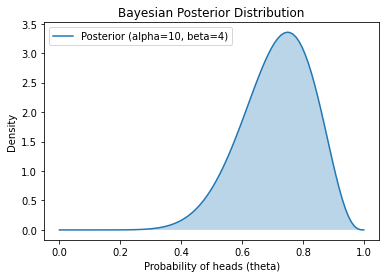

Bayesian estimate of theta (posterior mean): 0.714


In [8]:
from scipy.stats import beta
import numpy as np

# Prior: Beta(2, 2)
alpha_prior = 2
beta_prior = 2

# Data
heads = 8
tails = 2

# Posterior parameters
alpha_post = alpha_prior + heads
beta_post = beta_prior + tails

# Generate the posterior distribution
x = np.linspace(0, 1, 100)
posterior = beta.pdf(x, alpha_post, beta_post)

# Plot the posterior distribution
import matplotlib.pyplot as plt
plt.plot(x, posterior, label=f"Posterior (alpha={alpha_post}, beta={beta_post})")
plt.fill_between(x, posterior, alpha=0.3)
plt.title("Bayesian Posterior Distribution")
plt.xlabel("Probability of heads (theta)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Bayesian estimate (posterior mean)
bayesian_estimate = alpha_post / (alpha_post + beta_post)
print(f"Bayesian estimate of theta (posterior mean): {bayesian_estimate:.3f}")


**Explanation**:
   - The Bayesian approach provides a full posterior distribution for \( \theta \), incorporating both the prior belief and the observed data.
   - The posterior mean is the Bayesian point estimate of \( \theta \). In this case, the prior belief about \( \theta \) influences the estimate, but the data dominates as more observations are added.
   - The posterior distribution gives us a range of plausible values for \( \theta \), unlike the single point estimate in the frequentist approach.

---

#### **Interpretation of Uncertainty**
   - **Bayesian**: The Bayesian posterior distribution reflects the uncertainty about \( \theta \), incorporating both the prior and the data. You can calculate credible intervals to express uncertainty.
   - **Frequentist**: The frequentist confidence interval is based on the idea of repeated sampling. A 95% confidence interval means that, if we repeated the experiment many times, 95% of the intervals would contain the true parameter. However, this does not imply that there is a 95% chance that the true parameter lies within any specific interval.



### 4. Bayesian Inference in Practice

#### **Markov Chain Monte Carlo (MCMC) Methods**

- **MCMC** is a class of algorithms used to sample from complex posterior distributions, especially when the posterior cannot be calculated analytically.
- The key idea is to construct a Markov chain that has the desired posterior distribution as its equilibrium distribution, and then to sample from this chain to approximate the posterior.

- **Popular MCMC Algorithms**:
  - **Metropolis-Hastings**: Proposes a new value for the parameter and accepts or rejects it based on the likelihood ratio.
  - **Gibbs Sampling**: Sequentially samples from the conditional distribution of each parameter, given the current values of the other parameters.
  - **Hamiltonian Monte Carlo (HMC)**: Uses gradients of the likelihood to make more informed proposals, improving efficiency.

#### **Posterior Predictive Distribution**
- Once we have a posterior distribution over a parameter, we can use it to make predictions about future or unseen data. This is known as the **posterior predictive distribution**.
- The posterior predictive distribution is obtained by integrating over all possible values of the parameter, weighted by their posterior probabilities.

#### **Bayesian Model Comparison and Bayes Factor**

- **Bayes Factor**: A Bayesian alternative to hypothesis testing that compares two models by calculating the ratio of their marginal likelihoods:
  \[
  \text{BF}_{10} = \frac{P(\text{data}|\text{H}_1)}{P(\text{data}|\text{H}_0)}
  \]
  - **BF > 1**: Supports the alternative hypothesis.
  - **BF < 1**: Supports the null hypothesis.

#### **Example: Bayesian Inference with MCMC**

We will perform a simple Bayesian inference using the `PyMC3` library, which is a popular package for Bayesian modeling. We will estimate the probability \( \theta \) of heads in a coin flip using MCMC.



In [9]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Data: observed heads and tails
heads = 8
tails = 2

# Bayesian model using PyMC3
with pm.Model() as model:
    # Prior: Beta(2, 2)
    theta = pm.Beta("theta", alpha=2, beta=2)
    
    # Likelihood: Binomial distribution
    y_obs = pm.Binomial("y_obs", n=heads + tails, p=theta, observed=heads)
    
    # Posterior sampling using MCMC (Metropolis-Hastings)
    trace = pm.sample(2000, step=pm.Metropolis(), return_inferencedata=False)

# Plot posterior distribution
pm.plot_posterior(trace)
plt.show()

# Summary of the posterior distribution
pm.summary(trace)


ModuleNotFoundError: No module named 'pymc3'

**Explanation**:
  - **Model specification**: We define a prior for \( \theta \) using a Beta distribution and a likelihood for the observed number of heads using a Binomial distribution.
  - **MCMC sampling**: We use Metropolis-Hastings to draw samples from the posterior distribution of \( \theta \).
  - The posterior distribution plot shows the range of plausible values for \( \theta \), and the summary provides statistics like the mean and credible intervals.

#### **Posterior Predictive Distribution**

Once we have the posterior samples for \( \theta \), we can use them to make predictions about future coin flips. This is known as the posterior predictive distribution.



In [10]:
# Generate posterior predictive distribution
with model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)

# Plot posterior predictive distribution
plt.hist(ppc["y_obs"], bins=10, density=True)
plt.title("Posterior Predictive Distribution")
plt.xlabel("Number of heads")
plt.ylabel("Density")
plt.show()


NameError: name 'model' is not defined

**Explanation**:
  - We use the posterior samples of \( \theta \) to simulate future coin flips and create the posterior predictive distribution.
  - The histogram shows the expected distribution of heads based on our posterior belief about \( \theta \).



### 5. Bayesian Inference with Python

#### **Basic Example of Bayesian Inference: Coin Flip with Beta-Binomial Model**

Let's revisit the coin flip problem and perform Bayesian inference using a Beta prior and a Binomial likelihood.

##### **Bayesian Model**
- We assume a **Beta prior** on \( \theta \), the probability of getting heads in a coin flip.
- After observing data (number of heads and tails), we update our prior to obtain the **posterior distribution**.

#### **Python Implementation (Using `scipy` and `matplotlib`)**

We will use the **Beta-Binomial model** for Bayesian inference, updating the prior based on the data observed from flipping a coin.



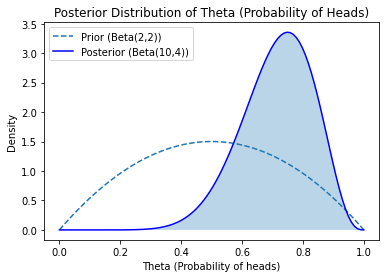

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters (Beta distribution)
alpha_prior = 2
beta_prior = 2

# Data: observed heads and tails
heads = 8
tails = 2

# Posterior parameters
alpha_post = alpha_prior + heads
beta_post = beta_prior + tails

# Generate posterior distribution
x = np.linspace(0, 1, 100)
posterior = beta.pdf(x, alpha_post, beta_post)

# Plot prior and posterior distributions
plt.plot(x, beta.pdf(x, alpha_prior, beta_prior), label='Prior (Beta(2,2))', linestyle='--')
plt.plot(x, posterior, label=f"Posterior (Beta({alpha_post},{beta_post}))", color='blue')
plt.fill_between(x, posterior, alpha=0.3)
plt.title("Posterior Distribution of Theta (Probability of Heads)")
plt.xlabel("Theta (Probability of heads)")
plt.ylabel("Density")
plt.legend()
plt.show()


**Explanation**:
  - **Prior**: We start with a **Beta(2, 2)** prior, which expresses our initial belief that the probability of heads is around 0.5.
  - **Posterior**: After observing 8 heads and 2 tails, the posterior distribution is updated to **Beta(10, 4)**, reflecting our updated belief about the probability of heads.
  - The plot shows both the prior and posterior distributions, highlighting how the data updates our belief about \( \theta \).

#### **Bayesian Linear Regression Example**

Bayesian linear regression extends classical linear regression by placing priors on the regression coefficients and using the data to compute the posterior distribution of the coefficients.

Let’s use `PyMC3` to perform Bayesian linear regression on a simple dataset.

##### **Bayesian Linear Regression Model**
- The model assumes a normal likelihood for the observed data and places Gaussian priors on the intercept and slope.
- We use MCMC to sample from the posterior distribution of the parameters.



In [12]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(0, 1, 100)

# Plot the data
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data for Bayesian Linear Regression")
plt.show()

# Bayesian linear regression model with PyMC3
with pm.Model() as linear_model:
    # Priors for the intercept and slope (Gaussian)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    slope = pm.Normal("slope", mu=0, sigma=10)
    
    # Likelihood (Normal distribution)
    sigma = pm.HalfNormal("sigma", sigma=1)
    y_obs = pm.Normal("y_obs", mu=intercept + slope * x, sigma=sigma, observed=y)
    
    # Posterior sampling using MCMC
    trace = pm.sample(2000, return_inferencedata=False)

# Plot posterior distributions of intercept and slope
pm.plot_posterior(trace)
plt.show()

# Summary of the posterior distribution
pm.summary(trace)


ModuleNotFoundError: No module named 'pymc3'

**Explanation**:
  - We generate synthetic data for a linear relationship between \( x \) and \( y \) with some added noise.
  - In the **Bayesian linear regression model**, we place Gaussian priors on the intercept and slope, and assume a normal likelihood for the observed data.
  - MCMC is used to sample from the posterior distributions of the intercept and slope.
  - The posterior distribution plot shows the range of plausible values for the intercept and slope based on the data, and the summary provides credible intervals and other statistics.

#### **Bayesian Logistic Regression (Optional Advanced)**

We can also extend Bayesian inference to classification problems using **Bayesian Logistic Regression**. In logistic regression, the outcome variable is binary, and we model the probability that an observation belongs to a certain class.

This can be done by placing priors on the regression coefficients and using a Bernoulli likelihood.

##### **Python Code (Bayesian Logistic Regression with PyMC3)**

Here’s an example using PyMC3 for Bayesian logistic regression:



In [13]:
# Binary classification data (for logistic regression)
x = np.linspace(-10, 10, 100)
y = np.random.binomial(1, 1 / (1 + np.exp(-x)), size=100)

# Bayesian logistic regression model
with pm.Model() as logistic_model:
    # Prior for the slope and intercept
    slope = pm.Normal('slope', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    
    # Logistic function (link function)
    p = pm.Deterministic('p', 1 / (1 + np.exp(-(intercept + slope * x))))
    
    # Likelihood (Bernoulli distribution)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
    
    # Posterior sampling
    trace = pm.sample(2000, return_inferencedata=False)

# Plot posterior distributions of slope and intercept
pm.plot_posterior(trace)
plt.show()


NameError: name 'pm' is not defined

**Explanation**:
  - This is a **Bayesian logistic regression** model, where we place Gaussian priors on the slope and intercept.
  - The outcome \( y \) is binary, so we use a **Bernoulli likelihood** to model the observed data.
  - The logistic function (sigmoid) transforms the linear equation into a probability, which is used in the Bernoulli likelihood.
  - MCMC samples from the posterior distribution of the slope and intercept, allowing us to estimate the relationship between \( x \) and the binary outcome \( y \).



### 6. Advanced Topics in Bayesian Statistics

#### **Hierarchical Bayesian Models**

- **Hierarchical Bayesian models** are useful for data with multi-level or nested structures, where individual observations are grouped into higher-level categories (e.g., students nested within schools, repeated measurements on individuals).
- Hierarchical models allow you to estimate both group-level (e.g., school-level) and individual-level (e.g., student-level) effects.
- By using **partial pooling**, hierarchical models share information across groups, allowing for more robust estimates, especially in groups with small sample sizes.

##### **Example: Hierarchical Bayesian Model (Student Test Scores)**

Suppose we have test scores for students from different schools. We can model the individual test scores for each student while allowing the average test score to vary by school.



In [14]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data: test scores for students from 5 schools
np.random.seed(42)
n_students = 100
n_schools = 5
school = np.repeat(np.arange(n_schools), n_students // n_schools)
true_school_means = np.random.normal(75, 5, size=n_schools)
test_scores = np.random.normal(true_school_means[school], 10, size=n_students)

# Plot test scores by school
plt.scatter(school, test_scores)
plt.xlabel("School")
plt.ylabel("Test Scores")
plt.title("Test Scores by School")
plt.show()

# Hierarchical Bayesian model
with pm.Model() as hierarchical_model:
    # Hyperpriors for the group-level distribution (school means)
    mu_school = pm.Normal("mu_school", mu=75, sigma=10)
    sigma_school = pm.HalfNormal("sigma_school", sigma=10)

    # Priors for each school's average score
    school_means = pm.Normal("school_means", mu=mu_school, sigma=sigma_school, shape=n_schools)

    # Likelihood (Normal distribution for individual test scores)
    sigma_student = pm.HalfNormal("sigma_student", sigma=10)
    test_scores_obs = pm.Normal("test_scores_obs", mu=school_means[school], sigma=sigma_student, observed=test_scores)

    # Posterior sampling using MCMC
    trace = pm.sample(2000, return_inferencedata=False)

# Plot posterior distributions of school means
pm.plot_posterior(trace, var_names=["school_means"])
plt.show()


ModuleNotFoundError: No module named 'pymc3'

**Explanation**:
  - We model the test scores for students, allowing for variability between schools by estimating a separate mean for each school.
  - The **hyperpriors** are placed on the school-level parameters (mean and standard deviation across schools).
  - The posterior distribution of the school means provides estimates for each school's average test score, incorporating both individual and group-level information.
  
#### **Approximate Bayesian Computation (ABC)**

- **Approximate Bayesian Computation (ABC)** is used when the likelihood is difficult or impossible to compute but simulating data is feasible.
- ABC approximates the posterior distribution by simulating data from a model with different parameter values and comparing the simulated data to the observed data. If the simulated data is close enough to the observed data, the corresponding parameter values are considered plausible.

##### **ABC Workflow**:
1. Sample a parameter value \( \theta \) from the prior.
2. Simulate data from the model using \( \theta \).
3. Compare the simulated data to the observed data using a distance metric.
4. If the simulated data is "close" to the observed data, accept \( \theta \); otherwise, reject it.

##### **Python Example: ABC for a Simple Model**

Let’s simulate a simple scenario where we can’t calculate the likelihood, but we can simulate data. We use ABC to approximate the posterior distribution of the parameter.



C:\Users\joeld\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


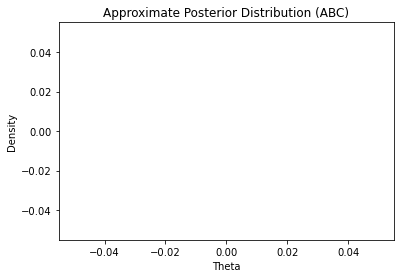

In [16]:
import numpy as np

# True parameter value
true_theta = 0.7

# Simulate observed data (e.g., coin flips with p = 0.7)
np.random.seed(42)
observed_data = np.random.binomial(1, true_theta, 100)

# ABC to approximate posterior distribution for theta
def simulate_data(theta, n=100):
    """Simulate binomial data based on theta."""
    return np.random.binomial(1, theta, size=n)

def distance(simulated_data, observed_data):
    """Compute distance between simulated and observed data."""
    return np.sum(np.abs(simulated_data - observed_data))

# Perform ABC
posterior_samples = []
n_iterations = 10000
for _ in range(n_iterations):
    # Sample a parameter from the prior (uniform prior)
    theta = np.random.uniform(0, 1)
    
    # Simulate data using this parameter
    simulated_data = simulate_data(theta)
    
    # Calculate the distance between simulated and observed data
    dist = distance(simulated_data, observed_data)
    
    # If the simulated data is close enough to the observed data, accept the sample
    if dist < 10:  # Tolerance level for closeness
        posterior_samples.append(theta)

# Plot the approximate posterior distribution
import matplotlib.pyplot as plt
plt.hist(posterior_samples, bins=30, density=True)
plt.title("Approximate Posterior Distribution (ABC)")
plt.xlabel("Theta")
plt.ylabel("Density")
plt.show()


**Explanation**:
  - In this example, we approximate the posterior distribution of \( \theta \) using ABC. We simulate data for different values of \( \theta \) and accept the parameter values if the simulated data is sufficiently close to the observed data.
  - The resulting histogram shows the approximate posterior distribution for \( \theta \).

#### **Bayesian Hypothesis Testing**

- **Bayesian hypothesis testing** allows us to compare models using posterior probabilities or Bayes factors, rather than relying on p-values.
- In Bayesian hypothesis testing, you can directly compare the plausibility of competing hypotheses (models) by computing the posterior probability of each hypothesis given the data.

##### **Bayes Factor for Hypothesis Testing**
- The **Bayes Factor (BF)** is the ratio of the marginal likelihoods of two models:
  \[
  \text{BF}_{10} = \frac{P(\text{data}|\text{H}_1)}{P(\text{data}|\text{H}_0)}
  \]
  - **BF > 1**: Evidence in favor of the alternative hypothesis.
  - **BF < 1**: Evidence in favor of the null hypothesis.

